# Classification Examples (Two Classes)
This notebook shows some simple examples of classification models for a dataset with two classes.

In [1]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# define color palettes
from matplotlib.colors import ListedColormap
# background_cmap3 = ListedColormap(['#68abf0','#b2d0b7','#f65d79'])
background_cmap3 = ListedColormap(['#a6cdf6','#b2d0b7','#f98ea1'])
background_cmap2 = ListedColormap(['#a6cdf6','#b2d0b7']) #'#f98ea1'])
dots_cmap = ListedColormap(['#1b80e8','#599062','#e20c32'])
plt.register_cmap(cmap=background_cmap3)
plt.register_cmap(cmap=background_cmap2)
plt.register_cmap(cmap=dots_cmap)
colors = ['#1b80e8','#599062','#e20c32']
colors2 = ['#1b80e8','#599062'] #'#e20c32']
point_size = 40
line_width = 4

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [2]:
# define the random seed if needed
random_seed = 1234

# define the figure size and the font size
fig_width = 12
fig_height = 9
fig_font_size = 16

## The Dataset
First we load the data and check out the number of examples, variables, and classes. Then, we define the input variables X and the target class value y.

In [4]:
iris = datasets.load_iris()
target = np.array(iris.target)

print("Number of examples: ", iris.data.shape[0])
print("Number of variables:", iris.data.shape[0])
print("Variable names:     ", iris.feature_names)
print("Target values:      ", iris.target_names)
print("Class Distribution  ", [(x, sum(target==x)) for x in np.unique(target)])

Number of examples:  150
Number of variables: 150
Variable names:      ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target values:       ['setosa' 'versicolor' 'virginica']
Class Distribution   [(0, 50), (1, 50), (2, 50)]


In [7]:
X = iris.data[:, :2]
y = iris.target

Let's define the grid to plot the decision boundaries for the predictions.

In [8]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# resolution
h = .01

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Let's work with two classes
We reshape the problem as a two classes problem. 

In [9]:
y2 = [0 if (x==0) else 1 for x in iris.target]

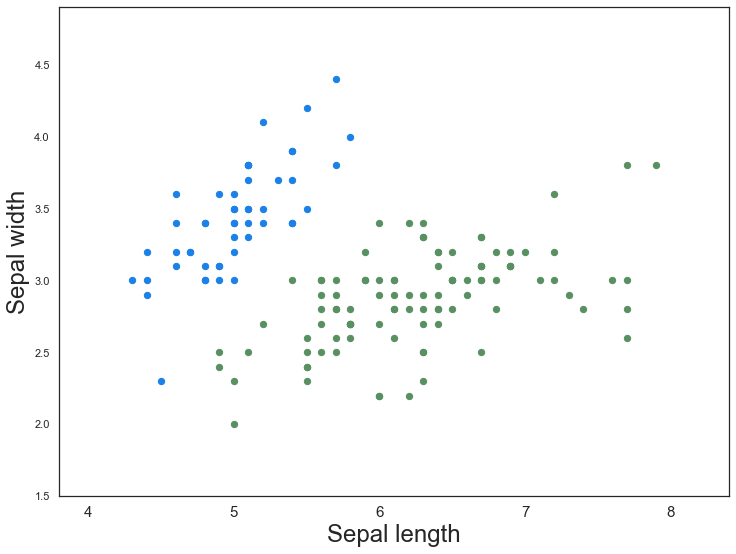

In [10]:
plt.figure(figsize=(12, 9))

plt.rc('font', **{'family' : 'sans', 'size'   : 24})
plt.rc('xtick', labelsize=15)

for i in [0, 1]:
    idx = np.where(np.array(y2)==i)
    plt.scatter(X[idx, 0], X[idx, 1], s=point_size, c=colors2[i]) 

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show();

In [12]:
lr = linear_model.LogisticRegression(C=10e10, random_state=1234)
lr.fit(X, y2)

LogisticRegression(C=100000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

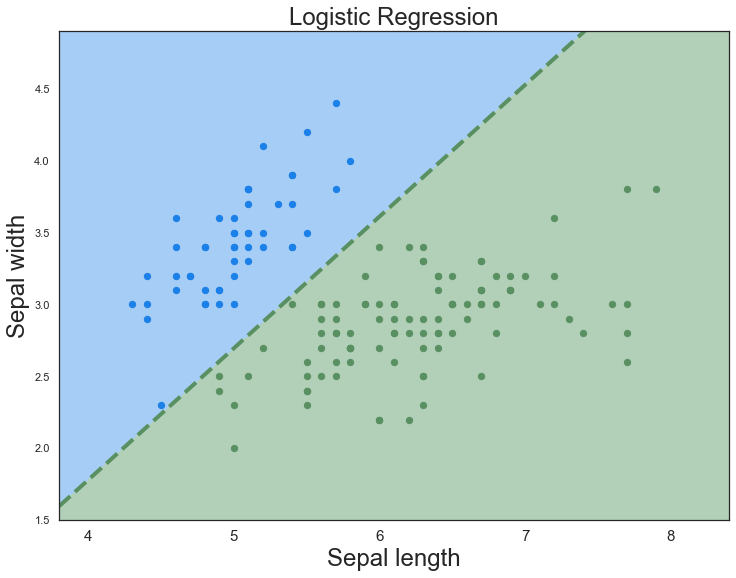

In [14]:
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx, yy, z, cmap=background_cmap2)

font = {'family' : 'sans', 'size'   : 32}
plt.rc('font', **font)

for i, color in zip(lr.classes_, colors2):
    idx = np.where(y2 == i)
    plt.scatter(X[idx, 0], X[idx, 1], s=point_size, c=color) #, cmap=plt.cm.Pastel2)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

### plot also the planes
### plot also the planes
coef = lr.coef_
intercept = lr.intercept_

def line(x):
    return (-(x * coef[0][0]) - intercept)/coef[0][1]

plt.plot([x_min, x_max], [line(x_min), line(x_max)], ls="--", lw=line_width, color=color)

plt.title("Logistic Regression")
# # colors = "rgb"
# for i, color in zip(lr.classes_, colors):
#     plot_hyperplane(i, color)

plt.show()

## Decision Tree Model

In [11]:
dt = DecisionTreeClassifier().fit(X, y2)

In [12]:
z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

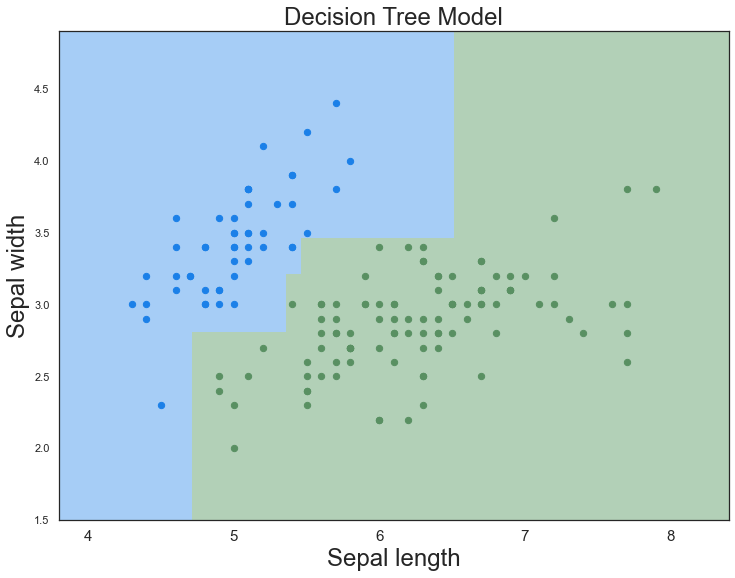

In [13]:
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx, yy, z, cmap=background_cmap2)

font = {'family' : 'sans', 'size'   : 32}
plt.rc('font', **font)

for i, color in zip(lr.classes_, colors2):
    idx = np.where(y2 == i)
    plt.scatter(X[idx, 0], X[idx, 1], s=point_size, c=color) #, cmap=plt.cm.Pastel2)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.title("Decision Tree Model")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show();

In [14]:
knn = KNeighborsClassifier(5, 'uniform').fit(X, y2)

In [15]:
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

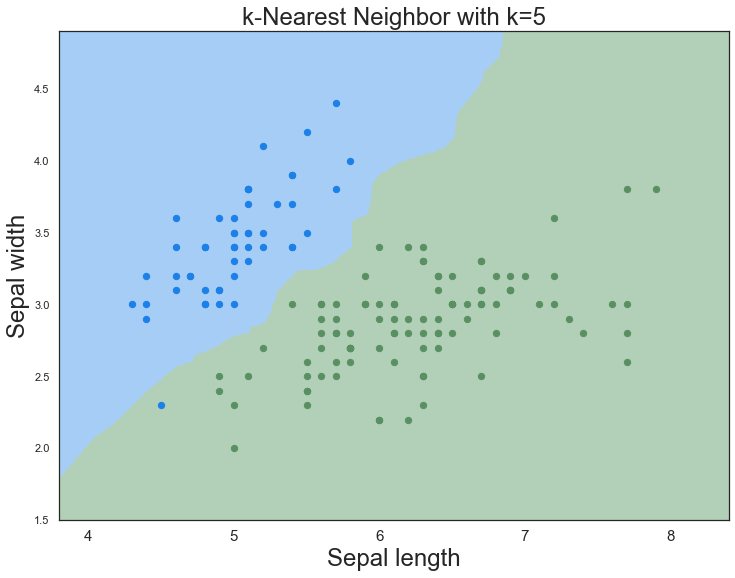

In [16]:
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx, yy, z, cmap=background_cmap2)

font = {'family' : 'sans', 'size'   : 32}
plt.rc('font', **font)

for i, color in zip(lr.classes_, colors2):
    idx = np.where(y2 == i)
    plt.scatter(X[idx, 0], X[idx, 1], s=point_size, c=color) #, cmap=plt.cm.Pastel2)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k-Nearest Neighbor with k=5")
plt.show();